In [1]:
# Import Dependencies
import pandas as pd
import numpy as np  
import csv 
import datetime as dt

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#To plot the graph embedded in the notebook
%matplotlib inline

# Machine Learning dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# PREDICT 1 BDR HOUSE PRICES IN NORTH CAROLINA

In [2]:
# Read in the dataset for 1 bedroom house price prediction
nc_1bdr_final = pd.read_csv('./static/data/rw_nc_1bdr_final.csv')
nc_1bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,114560.250000,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,117300.225275,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,35063.496599,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,126763.427083,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,370912.251938,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
401,Winterville,28590,57159.475000,5,24613.0,2747.0,65594.0,11.160769
402,Wrightsville Beach,28480,274212.242424,1,2536.0,216.0,83417.0,8.517350
403,Youngsville,27596,100356.464865,3,18359.0,1624.0,70535.0,8.845798
404,Zebulon,27597,114133.758865,5,23538.0,2995.0,58514.0,12.724106


In [3]:
# Created a df without price to check coorelation among features
nc_1bdr_explore = nc_1bdr_final[["city","zipcode", "number_of_schools", "population", "poverty_count", "median_household_income", "poverty_rate"]]
nc_1bdr_explore

,city,zipcode,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...
401,Winterville,28590,5,24613.0,2747.0,65594.0,11.160769
402,Wrightsville Beach,28480,1,2536.0,216.0,83417.0,8.517350
403,Youngsville,27596,3,18359.0,1624.0,70535.0,8.845798
404,Zebulon,27597,5,23538.0,2995.0,58514.0,12.724106


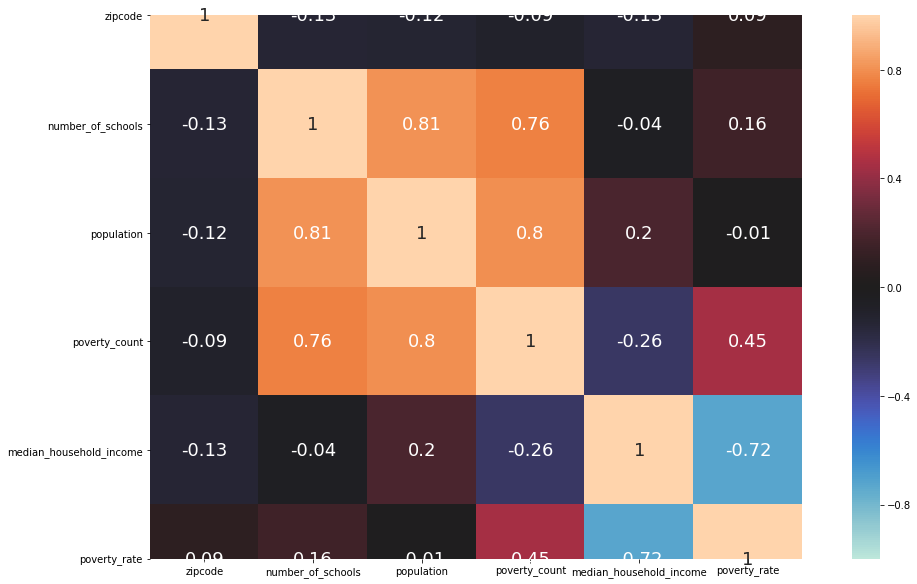

In [4]:
#check coorelation among features using seaborn library
nc_1bdr_corr_matrix = nc_1bdr_explore.corr().round(2)

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(data=nc_1bdr_corr_matrix, 
            annot=True, 
            annot_kws={"size": 18},
            vmin=-1, vmax=1, center= 0, 
            square=True,
            ax=ax,)

# Save Plot
plt.savefig('./static/images/Correlation Matrix_1bdr.png')


# The correlation coefficient ranges from -1 to 1. 
# If the value is close to 1, the variables have a strong positive correlation  
# When it is close to -1, the variables have a strong negative correlation

In [5]:
# OneHot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ["city", "zipcode"]
for i in var_mod:
    nc_1bdr_final[i] = le.fit_transform(nc_1bdr_final[i])
#Dummy Variables:
nc_1bdr_final = pd.get_dummies(nc_1bdr_final, columns = var_mod)
nc_1bdr_final

,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate,city_0,city_1,city_2,city_3,...,zipcode_396,zipcode_397,zipcode_398,zipcode_399,zipcode_400,zipcode_401,zipcode_402,zipcode_403,zipcode_404,zipcode_405
0,114560.250000,4,13700.0,2826.0,51725.0,20.627737,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,117300.225275,2,14555.0,932.0,78095.0,6.403298,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35063.496599,8,26601.0,5208.0,45121.0,19.578211,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,126763.427083,5,21299.0,2601.0,56338.0,12.211841,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,370912.251938,7,40280.0,2248.0,110513.0,5.580933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,57159.475000,5,24613.0,2747.0,65594.0,11.160769,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402,274212.242424,1,2536.0,216.0,83417.0,8.517350,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,100356.464865,3,18359.0,1624.0,70535.0,8.845798,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,114133.758865,5,23538.0,2995.0,58514.0,12.724106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Define dependent and independent variables
X_1bdr = nc_1bdr_final.drop('avg_house_price', axis = 1) # Drop unnecessary columns
y_1bdr = nc_1bdr_final["avg_house_price"].values.reshape(-1,1)

In [7]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_1bdr, X_test_1bdr, y_train_1bdr, y_test_1bdr = train_test_split(X_1bdr, y_1bdr, random_state=42)

In [8]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_1bdr = LinearRegression()

In [9]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_1bdr.fit(X_train_1bdr, y_train_1bdr)
training_score_1bdr = model_1bdr.score(X_train_1bdr, y_train_1bdr)
testing_score_1bdr = model_1bdr.score(X_test_1bdr, y_test_1bdr)

# Print Scores
print(f"1 BDR Training Score: {training_score_1bdr}")
print(f"1 BDR Testing Score: {testing_score_1bdr}")

1 BDR Training Score: 1.0
1 BDR Testing Score: 0.31096415617858875


1 BDR Mean Squared Error (MSE): 1965963962.7895427
1 BDR R-squared (R2 ): 0.31096415617858875


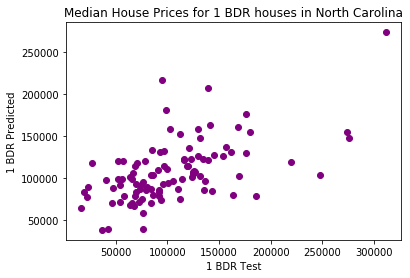

In [10]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_1bdr = model_1bdr.predict(X_test_1bdr)

# Score the predictions with mse and r2
mse_1bdr = mean_squared_error(y_test_1bdr, predicted_1bdr)
r2_1bdr = r2_score(y_test_1bdr, predicted_1bdr)
print(f"1 BDR Mean Squared Error (MSE): {mse_1bdr}")
print(f"1 BDR R-squared (R2 ): {r2_1bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_1bdr,predicted_1bdr, c="purple")

# Label plot
plt.xlabel('1 BDR Test')
plt.ylabel('1 BDR Predicted')

plt.title('Median House Prices for 1 BDR houses in North Carolina')

# Save Plot
plt.savefig('./static/images/LinearRegression_1bdr.png')

# Show plot
plt.show()

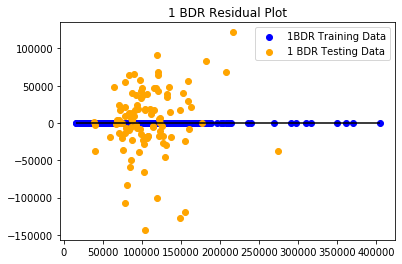

In [11]:
plt.scatter(model_1bdr.predict(X_train_1bdr), model_1bdr.predict(X_train_1bdr) - y_train_1bdr, c="blue", label="1BDR Training Data")

plt.scatter(model_1bdr.predict(X_test_1bdr), model_1bdr.predict(X_test_1bdr) - y_test_1bdr, c="orange", label="1 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y_1bdr.min(), xmax=y_1bdr.max())

plt.title("1 BDR Residual Plot")
plt.savefig('./static/images/Residual Plot_1bdr.png')

# PREDICT 2 BDR HOUSE PRICES IN NORTH CAROLINA

In [12]:
# Read in the dataset for 2 bedroom house price prediction
nc_2bdr_final = pd.read_csv('./static/data/rw_nc_2bdr_final.csv')
nc_2bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,99995.515789,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,132251.410811,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,58202.006803,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,101196.766667,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,155699.619863,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
491,Wrightsville Beach,28480,603578.373626,1,2536.0,216.0,83417.0,8.517350
492,Yadkinville,27055,86084.994565,4,14131.0,1855.0,44574.0,13.127167
493,Youngsville,27596,139581.902703,3,18359.0,1624.0,70535.0,8.845798
494,Zebulon,27597,103068.200692,5,23538.0,2995.0,58514.0,12.724106


In [13]:
# Created a df without price to check coorelation among features
nc_2bdr_explore = nc_2bdr_final[["city","zipcode", "number_of_schools", "population", "poverty_count", "median_household_income", "poverty_rate"]]
nc_2bdr_explore

,city,zipcode,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...
491,Wrightsville Beach,28480,1,2536.0,216.0,83417.0,8.517350
492,Yadkinville,27055,4,14131.0,1855.0,44574.0,13.127167
493,Youngsville,27596,3,18359.0,1624.0,70535.0,8.845798
494,Zebulon,27597,5,23538.0,2995.0,58514.0,12.724106


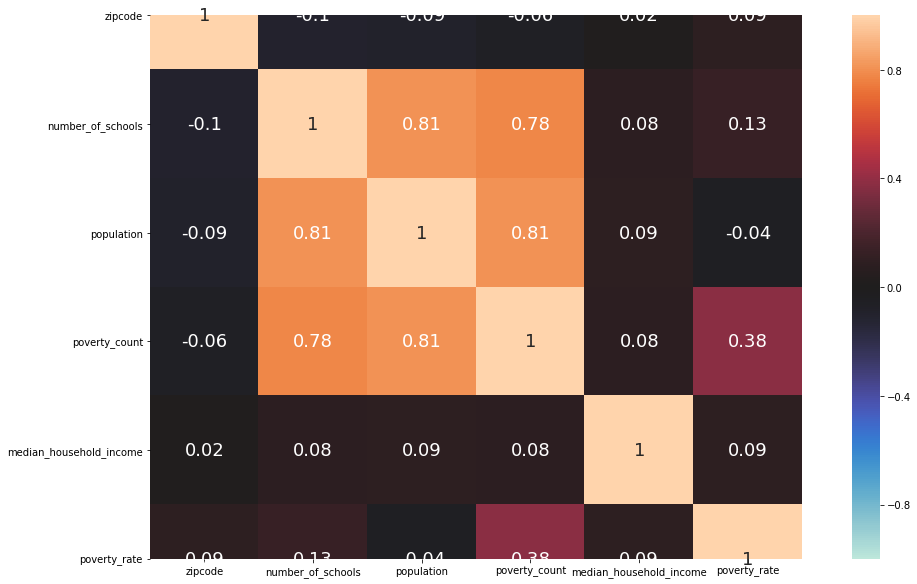

In [14]:
#check coorelation among features using seaborn library
nc_2bdr_corr_matrix = nc_2bdr_explore.corr().round(2)

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(data=nc_2bdr_corr_matrix, 
            annot=True, 
            annot_kws={"size": 18},
            vmin=-1, vmax=1, center= 0, 
            square=True,
            ax=ax,)

# Save Plot
plt.savefig('./static/images/Correlation Matrix_2bdr.png')


# The correlation coefficient ranges from -1 to 1. 
# If the value is close to 1, the variables have a strong positive correlation  
# When it is close to -1, the variables have a strong negative correlation

In [15]:
# OneHot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ["city", "zipcode"]
for i in var_mod:
    nc_2bdr_final[i] = le.fit_transform(nc_2bdr_final[i])
#Dummy Variables:
nc_2bdr_final = pd.get_dummies(nc_2bdr_final, columns = var_mod)
nc_2bdr_final

,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate,city_0,city_1,city_2,city_3,...,zipcode_486,zipcode_487,zipcode_488,zipcode_489,zipcode_490,zipcode_491,zipcode_492,zipcode_493,zipcode_494,zipcode_495
0,99995.515789,4,13700.0,2826.0,51725.0,20.627737,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,132251.410811,2,14555.0,932.0,78095.0,6.403298,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,58202.006803,8,26601.0,5208.0,45121.0,19.578211,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,101196.766667,5,21299.0,2601.0,56338.0,12.211841,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,155699.619863,7,40280.0,2248.0,110513.0,5.580933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,603578.373626,1,2536.0,216.0,83417.0,8.517350,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
492,86084.994565,4,14131.0,1855.0,44574.0,13.127167,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493,139581.902703,3,18359.0,1624.0,70535.0,8.845798,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494,103068.200692,5,23538.0,2995.0,58514.0,12.724106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Define dependent and independent variables
X_2bdr = nc_2bdr_final.drop('avg_house_price', axis = 1) # Drop unnecessary columns
y_2bdr = nc_2bdr_final["avg_house_price"].values.reshape(-1,1)

In [17]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_2bdr, X_test_2bdr, y_train_2bdr, y_test_2bdr = train_test_split(X_2bdr, y_2bdr, random_state=42)

In [18]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_2bdr = LinearRegression()

In [19]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_2bdr.fit(X_train_2bdr, y_train_2bdr)
training_score_2bdr = model_2bdr.score(X_train_2bdr, y_train_2bdr)
testing_score_2bdr = model_2bdr.score(X_test_2bdr, y_test_2bdr)

# Print Scores
print(f"2 BDR Training Score: {training_score_2bdr}")
print(f"2 BDR Testing Score: {testing_score_2bdr}")

2 BDR Training Score: 0.9999999999998856
2 BDR Testing Score: 0.21069246049087886


2 BDR Mean Squared Error (MSE): 3115258376.260631
2 BDR R-squared (R2): 0.21069246049087886


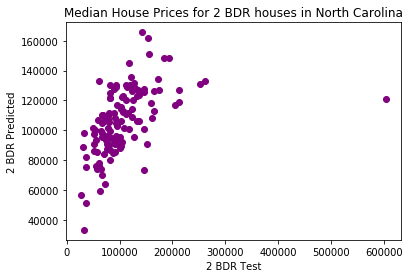

In [20]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_2bdr = model_2bdr.predict(X_test_2bdr)

# Score the predictions with mse and r2
mse_2bdr = mean_squared_error(y_test_2bdr, predicted_2bdr)
r2_2bdr = r2_score(y_test_2bdr, predicted_2bdr)
print(f"2 BDR Mean Squared Error (MSE): {mse_2bdr}")
print(f"2 BDR R-squared (R2): {r2_2bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_2bdr,predicted_2bdr, c="purple")

# Label plot
plt.xlabel('2 BDR Test')
plt.ylabel('2 BDR Predicted')

plt.title('Median House Prices for 2 BDR houses in North Carolina')

plt.savefig('./static/images/LinearRegression_2bdr.png')

# Show plot
plt.show()

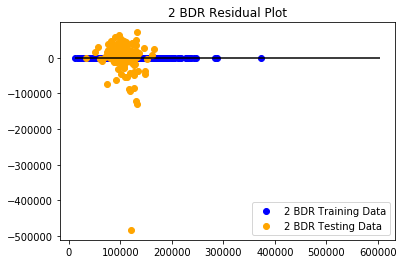

In [21]:
plt.scatter(model_2bdr.predict(X_train_2bdr), model_2bdr.predict(X_train_2bdr) - y_train_2bdr, c="blue", label="2 BDR Training Data")

plt.scatter(model_2bdr.predict(X_test_2bdr), model_2bdr.predict(X_test_2bdr) - y_test_2bdr, c="orange", label="2 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y_2bdr.min(), xmax=y_2bdr.max())

plt.title("2 BDR Residual Plot")
plt.savefig('./static/images/Residual Plot_2bdr.png')

# PREDICT 3 BDR HOUSE PRICES IN NORTH CAROLINA

In [22]:
# Read in the dataset for 3 bedroom house price prediction
nc_3bdr_final = pd.read_csv('./static/data/rw_nc_3bdr_final.csv')
nc_3bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,152390.688776,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,203515.118280,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,112205.683673,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,137745.621528,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,215726.292517,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
498,Wrightsville Beach,28480,867084.654762,1,2536.0,216.0,83417.0,8.517350
499,Yadkinville,27055,122836.272727,4,14131.0,1855.0,44574.0,13.127167
500,Youngsville,27596,165427.655290,3,18359.0,1624.0,70535.0,8.845798
501,Zebulon,27597,147983.479592,5,23538.0,2995.0,58514.0,12.724106


In [23]:
# Created a df without price to check coorelation among features
nc_3bdr_explore = nc_3bdr_final[["city","zipcode", "number_of_schools", "population", "poverty_count", "median_household_income", "poverty_rate"]]
nc_3bdr_explore

,city,zipcode,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...
498,Wrightsville Beach,28480,1,2536.0,216.0,83417.0,8.517350
499,Yadkinville,27055,4,14131.0,1855.0,44574.0,13.127167
500,Youngsville,27596,3,18359.0,1624.0,70535.0,8.845798
501,Zebulon,27597,5,23538.0,2995.0,58514.0,12.724106


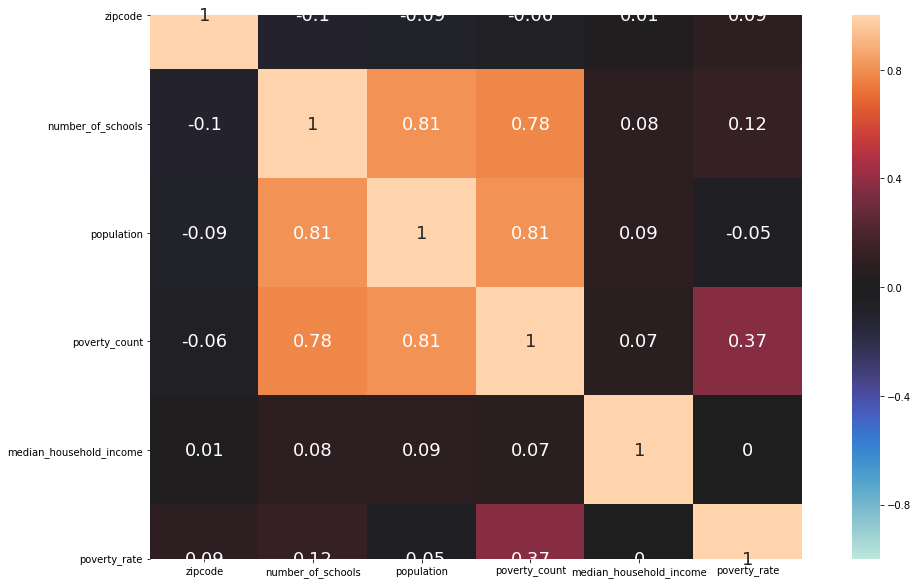

In [24]:
#check coorelation among features using seaborn library
nc_3bdr_corr_matrix = nc_3bdr_explore.corr().round(2)

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(data=nc_3bdr_corr_matrix, 
            annot=True, 
            annot_kws={"size": 18},
            vmin=-1, vmax=1, center= 0, 
            square=True,
            ax=ax,)

# Save Plot
plt.savefig('./static/images/Correlation Matrix_3bdr.png')


# The correlation coefficient ranges from -1 to 1. 
# If the value is close to 1, the variables have a strong positive correlation  
# When it is close to -1, the variables have a strong negative correlation

In [25]:
# OneHot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ["city", "zipcode"]
for i in var_mod:
    nc_3bdr_final[i] = le.fit_transform(nc_3bdr_final[i])
#Dummy Variables:
nc_3bdr_final = pd.get_dummies(nc_3bdr_final, columns = var_mod)
nc_3bdr_final

,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate,city_0,city_1,city_2,city_3,...,zipcode_493,zipcode_494,zipcode_495,zipcode_496,zipcode_497,zipcode_498,zipcode_499,zipcode_500,zipcode_501,zipcode_502
0,152390.688776,4,13700.0,2826.0,51725.0,20.627737,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,203515.118280,2,14555.0,932.0,78095.0,6.403298,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,112205.683673,8,26601.0,5208.0,45121.0,19.578211,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,137745.621528,5,21299.0,2601.0,56338.0,12.211841,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,215726.292517,7,40280.0,2248.0,110513.0,5.580933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,867084.654762,1,2536.0,216.0,83417.0,8.517350,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,122836.272727,4,14131.0,1855.0,44574.0,13.127167,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,165427.655290,3,18359.0,1624.0,70535.0,8.845798,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,147983.479592,5,23538.0,2995.0,58514.0,12.724106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Define dependent and independent variables
X_3bdr = nc_3bdr_final.drop('avg_house_price', axis = 1) # Drop unnecessary columns
y_3bdr = nc_3bdr_final["avg_house_price"].values.reshape(-1,1)

In [27]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_3bdr, X_test_3bdr, y_train_3bdr, y_test_3bdr = train_test_split(X_3bdr, y_3bdr, random_state=42)

In [28]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_3bdr = LinearRegression()

In [29]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_3bdr.fit(X_train_3bdr, y_train_3bdr)
training_score_3bdr = model_3bdr.score(X_train_3bdr, y_train_3bdr)
testing_score_3bdr = model_3bdr.score(X_test_3bdr, y_test_3bdr)

# Print Scores
print(f"3 BDR Training Score: {training_score_3bdr}")
print(f"3 BDR Testing Score: {testing_score_3bdr}")

3 BDR Training Score: 0.9999999999999994
3 BDR Testing Score: 0.1983428294660503


3 BDR Mean Squared Error (MSE): 7350201605.007996
3 BDR R-squared (R2): 0.1983428294660503


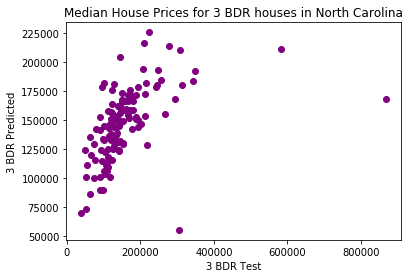

In [30]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_3bdr = model_3bdr.predict(X_test_3bdr)

# Score the predictions with mse and r2
mse_3bdr = mean_squared_error(y_test_3bdr, predicted_3bdr)
r2_3bdr = r2_score(y_test_3bdr, predicted_3bdr)
print(f"3 BDR Mean Squared Error (MSE): {mse_3bdr}")
print(f"3 BDR R-squared (R2): {r2_3bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_3bdr,predicted_3bdr, c="purple")

# Label plot
plt.xlabel('3 BDR Test')
plt.ylabel('3 BDR Predicted')

plt.title('Median House Prices for 3 BDR houses in North Carolina')

plt.savefig('./static/images/LinearRegression_3bdr.png')

# Show plot
plt.show()

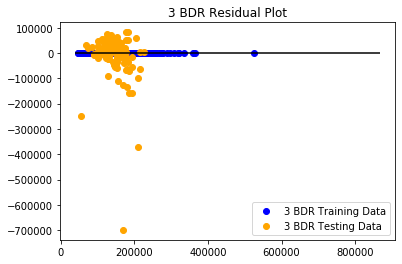

In [31]:
plt.scatter(model_3bdr.predict(X_train_3bdr), model_3bdr.predict(X_train_3bdr) - y_train_3bdr, c="blue", label="3 BDR Training Data")

plt.scatter(model_3bdr.predict(X_test_3bdr), model_3bdr.predict(X_test_3bdr) - y_test_3bdr, c="orange", label="3 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y_3bdr.min(), xmax=y_3bdr.max())

plt.title("3 BDR Residual Plot")
plt.savefig('./static/images/Residual Plot_3bdr.png')

# PREDICT 4 BDR HOUSE PRICES IN NORTH CAROLINA

In [32]:
# Read in the dataset for 4 bedroom house price prediction
nc_4bdr_final = pd.read_csv('./static/data/rw_nc_4bdr_final.csv')
nc_4bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,2.160320e+05,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,3.221646e+05,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,1.612910e+05,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,2.092624e+05,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,2.822962e+05,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
497,Wrightsville Beach,28480,1.119684e+06,1,2536.0,216.0,83417.0,8.517350
498,Yadkinville,27055,1.691515e+05,4,14131.0,1855.0,44574.0,13.127167
499,Youngsville,27596,2.375439e+05,3,18359.0,1624.0,70535.0,8.845798
500,Zebulon,27597,2.076993e+05,5,23538.0,2995.0,58514.0,12.724106


In [33]:
# Created a df without price to check coorelation among features
nc_4bdr_explore = nc_4bdr_final[["city","zipcode", "number_of_schools", "population", "poverty_count", "median_household_income", "poverty_rate"]]
nc_4bdr_explore

,city,zipcode,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...
497,Wrightsville Beach,28480,1,2536.0,216.0,83417.0,8.517350
498,Yadkinville,27055,4,14131.0,1855.0,44574.0,13.127167
499,Youngsville,27596,3,18359.0,1624.0,70535.0,8.845798
500,Zebulon,27597,5,23538.0,2995.0,58514.0,12.724106


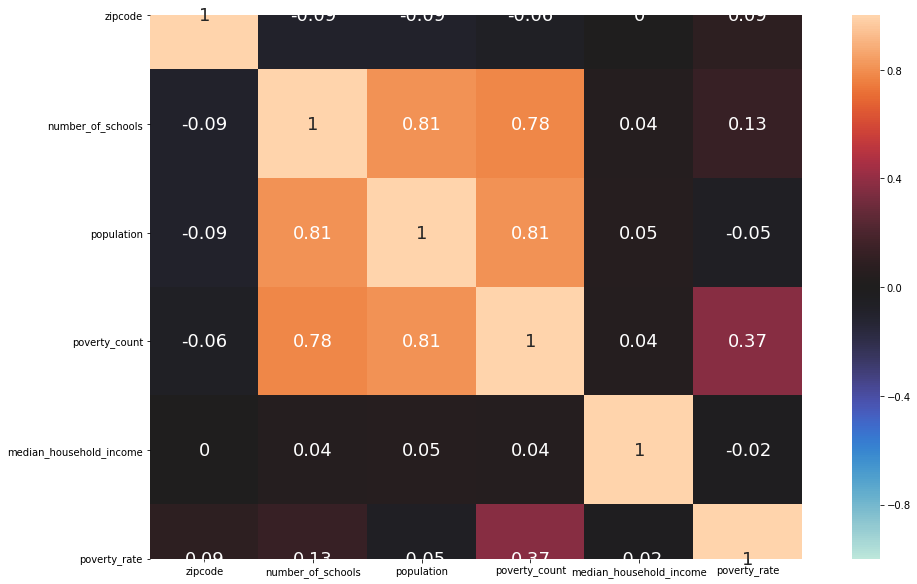

In [34]:
#check coorelation among features using seaborn library
nc_4bdr_corr_matrix = nc_4bdr_explore.corr().round(2)

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(data=nc_4bdr_corr_matrix, 
            annot=True, 
            annot_kws={"size": 18},
            vmin=-1, vmax=1, center= 0, 
            square=True,
            ax=ax,)

# Save Plot
plt.savefig('./static/images/Correlation Matrix_4bdr.png')


# The correlation coefficient ranges from -1 to 1. 
# If the value is close to 1, the variables have a strong positive correlation  
# When it is close to -1, the variables have a strong negative correlation

In [35]:
# OneHot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ["city", "zipcode"]
for i in var_mod:
    nc_4bdr_final[i] = le.fit_transform(nc_4bdr_final[i])
#Dummy Variables:
nc_4bdr_final = pd.get_dummies(nc_4bdr_final, columns = var_mod)
nc_4bdr_final

,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate,city_0,city_1,city_2,city_3,...,zipcode_492,zipcode_493,zipcode_494,zipcode_495,zipcode_496,zipcode_497,zipcode_498,zipcode_499,zipcode_500,zipcode_501
0,2.160320e+05,4,13700.0,2826.0,51725.0,20.627737,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.221646e+05,2,14555.0,932.0,78095.0,6.403298,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.612910e+05,8,26601.0,5208.0,45121.0,19.578211,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.092624e+05,5,21299.0,2601.0,56338.0,12.211841,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.822962e+05,7,40280.0,2248.0,110513.0,5.580933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,1.119684e+06,1,2536.0,216.0,83417.0,8.517350,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,1.691515e+05,4,14131.0,1855.0,44574.0,13.127167,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,2.375439e+05,3,18359.0,1624.0,70535.0,8.845798,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,2.076993e+05,5,23538.0,2995.0,58514.0,12.724106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Define dependent and independent variables
X_4bdr = nc_4bdr_final.drop('avg_house_price', axis = 1) # Drop unnecessary columns
y_4bdr = nc_4bdr_final["avg_house_price"].values.reshape(-1,1)

In [37]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_4bdr, X_test_4bdr, y_train_4bdr, y_test_4bdr = train_test_split(X_4bdr, y_4bdr, random_state=42)

In [38]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_4bdr = LinearRegression()

In [39]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_4bdr.fit(X_train_4bdr, y_train_4bdr)

training_score_4bdr = model_4bdr.score(X_train_4bdr, y_train_4bdr)
testing_score_4bdr = model_4bdr.score(X_test_4bdr, y_test_4bdr)


# model_4bdr.fit(X_train_4bdr_scaled, y_train_4bdr_scaled)

# training_score_4bdr = model_4bdr.score(X_train_4bdr_scaled, y_train_4bdr_scaled)
# testing_score_4bdr = model_4bdr.score(X_test_4bdr_scaled, y_test_4bdr_scaled)

# Print Scores
print(f"4 BDR Training Score: {training_score_4bdr}")
print(f"4 BDR Testing Score: {testing_score_4bdr}")

4 BDR Training Score: 1.0
4 BDR Testing Score: -1635493.189479164


4 BDR Mean Squared Error (MSE): 3.093653707256449e+16
4 BDR R-squared (R2): -1635493.189479164


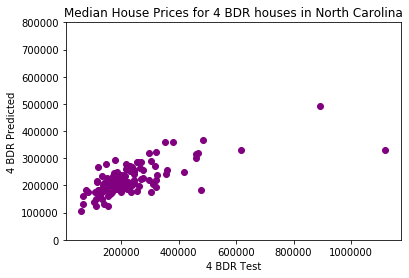

In [40]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_4bdr = model_4bdr.predict(X_test_4bdr)
# predicted_4bdr = model_4bdr.predict(X_test_4bdr_scaled)

# Score the predictions with mse and r2
mse_4bdr = mean_squared_error(y_test_4bdr, predicted_4bdr)
r2_4bdr = r2_score(y_test_4bdr, predicted_4bdr)

# mse_4bdr = mean_squared_error(y_test_4bdr_scaled, predicted_4bdr)
# r2_4bdr = r2_score(y_test_4bdr_scaled, predicted_4bdr)


print(f"4 BDR Mean Squared Error (MSE): {mse_4bdr}")
print(f"4 BDR R-squared (R2): {r2_4bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_4bdr,predicted_4bdr, c="purple")
# plt.scatter(y_test_4bdr_scaled,predicted_4bdr, c="purple")

# Label plot
plt.xlabel('4 BDR Test')
plt.ylabel('4 BDR Predicted')

plt.ylim(-3,800000)

plt.title('Median House Prices for 4 BDR houses in North Carolina')

plt.savefig('./static/images/LinearRegression_4bdr.png')

# Show plot
plt.show()

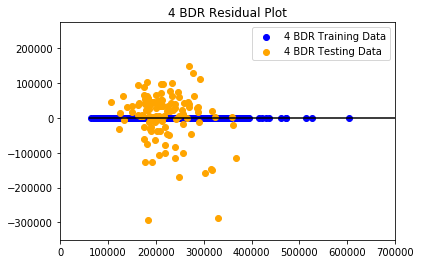

In [41]:
plt.scatter(model_4bdr.predict(X_train_4bdr), model_4bdr.predict(X_train_4bdr) - y_train_4bdr, c="blue", label="4 BDR Training Data")

plt.scatter(model_4bdr.predict(X_test_4bdr), model_4bdr.predict(X_test_4bdr) - y_test_4bdr, c="orange", label="4 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y_4bdr.min(), xmax=y_4bdr.max())

plt.title("4 BDR Residual Plot")
plt.ylim(-350000, 275000)
plt.xlim(0, 700000)

plt.savefig('./static/images/Residual Plot_4bdr.png')